In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("../student_lifestyle_dataset.csv")
columns = df.columns
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [64]:
df["Stress_Level"] = df["Stress_Level"].map({
    "Low" : 1,
    "Moderate" : 0,
    "High" : -1
})

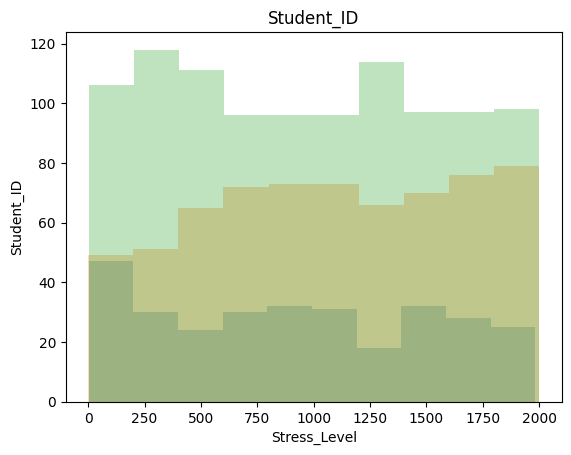

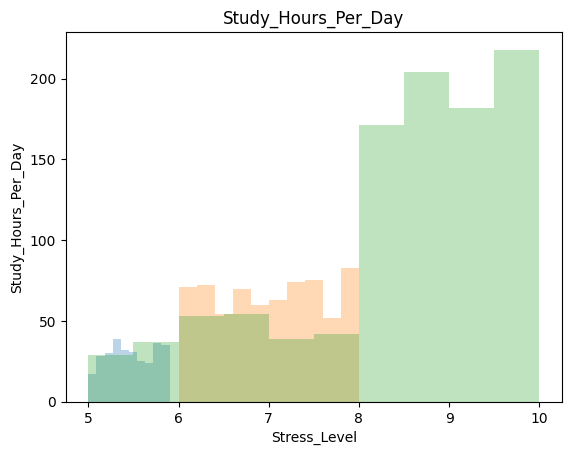

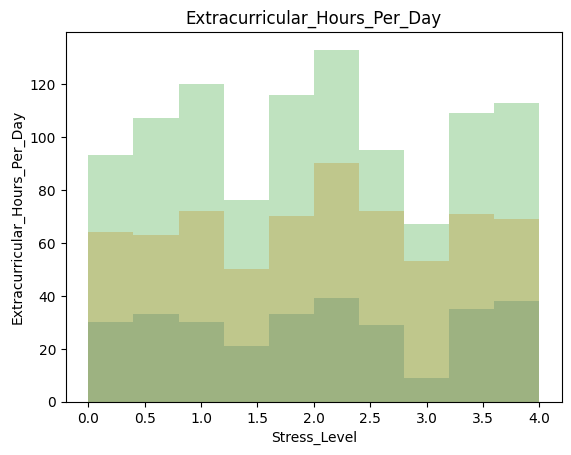

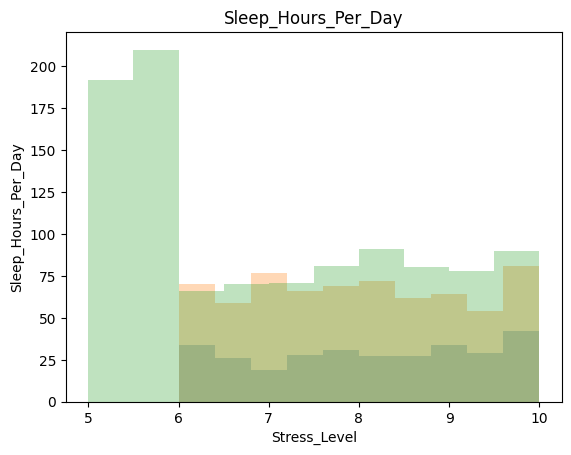

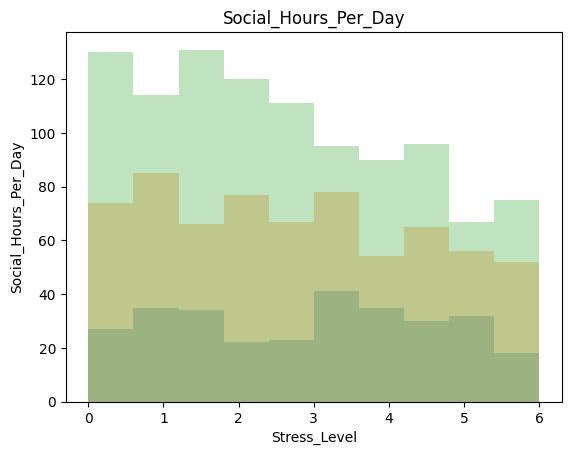

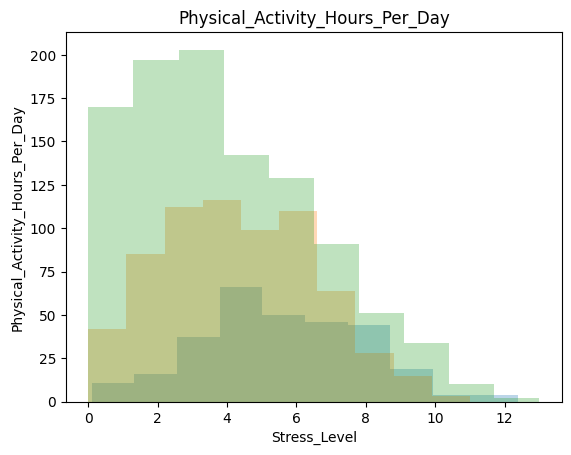

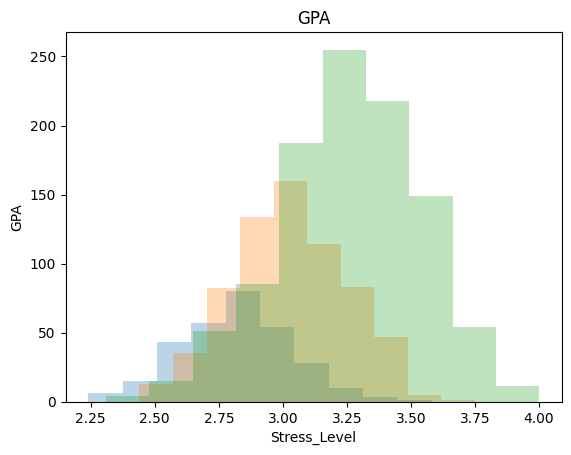

In [65]:
for col in columns[:-1]:
    plt.hist(df[df["Stress_Level"] == 1][col], label="Low", alpha=0.3)
    plt.hist(df[df["Stress_Level"] == 0][col], label="Moderate", alpha = 0.3)
    plt.hist(df[df["Stress_Level"] == -1][col], label="High", alpha = 0.3)
    plt.xlabel("Stress_Level")
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [66]:
columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [67]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [68]:
label_enc = LabelEncoder()
for col in columns:
    df[col] = label_enc.fit_transform(df[col])

In [69]:
x = df[columns[:-1]]
y = df[columns[-1]]

In [70]:
chi_scores, p_values = chi2(x, y)

In [71]:
chi_scores

array([5.04601653e+03, 8.93871553e+03, 1.44981125e+00, 1.76384451e+03,
       6.36177864e+01, 1.39370818e+03, 6.92281985e+03])

In [72]:
p_values

array([0.00000000e+000, 0.00000000e+000, 4.84370279e-001, 0.00000000e+000,
       1.53310959e-014, 2.29146505e-303, 0.00000000e+000])

In [73]:
df = df.drop(columns=[columns[0], columns[2], columns[4], columns[5]])

In [74]:
df.head()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA,Stress_Level
0,19,37,65,1
1,3,30,41,2
2,1,42,33,2
3,15,22,54,1
4,31,15,117,0


In [75]:
df.to_csv("../../model/data/stress_class.csv", index=False)